source data: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [ ]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score


#Standard libraries for data visualization---------------------

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------

import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Course/Data Science/Project/Project 6 - Customer Churn Classification/customer_churn_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


jika kita lihat dari info di atas, data sudah cukup bersih dari data null sehingga tidak perlu kita cek kembali di bagian cleaning dataset

# Cleaning Dataset

In [ ]:
# check duplicate
df.duplicated().sum()

0

Jumlah data yang duplikat adalah 0 sehingga kita bisa maju ke step yang berikutnya untuk melihat data unik dari setiap kolom

In [ ]:
for column in df.columns:
  print(f"{column}: ", df[column].unique())

customerID:  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:  ['Female' 'Male']
SeniorCitizen:  [0 1]
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
tenure:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No phone service' 'No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes' 'No internet service']
OnlineBackup:  ['Yes' 'No' 'No internet service']
DeviceProtection:  ['No' 'Yes' 'No internet service']
TechSupport:  ['No' 'Yes' 'No internet service']
StreamingTV:  ['No' 'Yes' 'No internet service']
StreamingMovies:  ['No' 'Yes' 'No internet service']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank tr

karena kita ingin nilai numerik bertipe integer atau float, kita perlu memeriksa tipe data kolom TotalCharges. Terkadang, kolom ini mungkin berisi tipe objek yang bukan numerik, sehingga mencegah konversi ke float atau int. Untuk mengatasinya, kita akan mengganti nilai tersebut dengan NaN lalu mengisinya dengan mean kolom TotalCharges.

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [ ]:
# isi nilai NaN dengan nilai rata-rata dari kolom "TotalCharges"
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean().round(3))

In [ ]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

# EDA

## Distribution

In [ ]:
df_eda = df.copy()

In [ ]:
df_eda['SeniorCitizen'] = df_eda['SeniorCitizen'].astype(str)

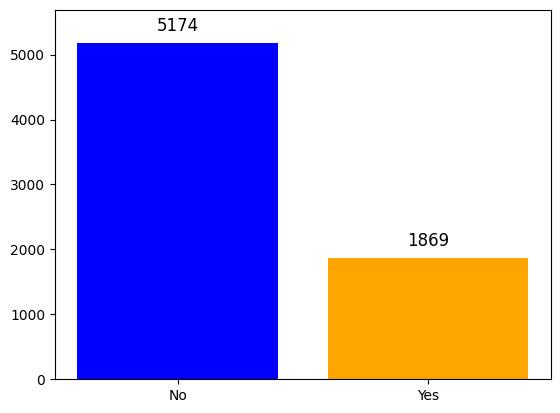

In [ ]:
# Assuming df is your DataFrame and 'gender' is a column in it
data = df_eda['Churn'].value_counts()

# Font properties for the text
font_properties = {
    'size': 12,
}

# Create the bar plot
plt.bar(data.index, data.values, color=['blue', 'orange'])

# Determine the gap between text and upper bar and set the upper limit for y-axis
space = data.max()*0.05/2
y_max = data.max() + data.max()*0.1

# Set y-axis limit
plt.ylim(0, y_max)

# Add the counts in uppercase and bold on top of each bar with some gap
for index, value in enumerate(data.values):
    plt.text(index, value+space, str(value), ha='center', va='bottom', fontdict=font_properties)

# Show the plot
plt.show()


Berdasarkan grafik di atas, data churnnya cukup imbalance dengan rasio no:yes-nya adalah 73:27.

Dari hasil ini, maka kita harus fokus lebih ke arah recall, presisi atau f-score dibanding dengan akurasi.

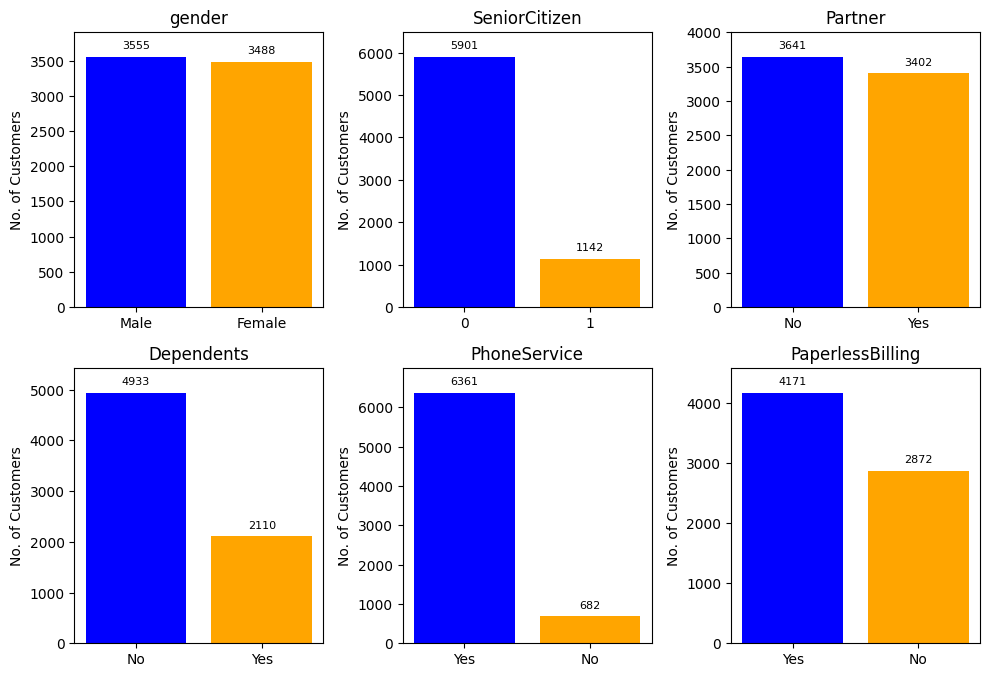

In [ ]:
import matplotlib.pyplot as plt

columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Create a 3x3 subplot
fig = plt.figure(figsize=(10, 10))

# Font properties for the text
font_properties = {
    'size': 8,
}

# Adding each subplot manually
for i in range(1, len(columns) + 1):
    ax = fig.add_subplot(3, 3, i) # create a subplot
    ax.set_title(columns[i - 1]) # set title
    ax.set_ylabel("No. of Customers") # give a label to y-axis

    categories = df_eda[columns[i - 1]].value_counts().index # index of count
    values = df_eda[columns[i - 1]].value_counts().values # values of count

    bars = ax.bar(categories, values, color=['blue', 'orange'])  # create the bar plot

    # Determine the upper limit for the y-axis
    space = values.max()*0.05/2 # to create spacing between top vaue of bar and the text label
    y_max = values.max() + values.max()*0.1 # to create the limit of y-axis
    plt.ylim(0, y_max)

    # Add text on top of the bars with custom font
    for bar in bars:
        yval = bar.get_height()
        xval = bar.get_x() + bar.get_width()/2
        ax.text(xval, yval + space, str(int(yval)).upper(), ha='center', va='bottom', fontdict=font_properties)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


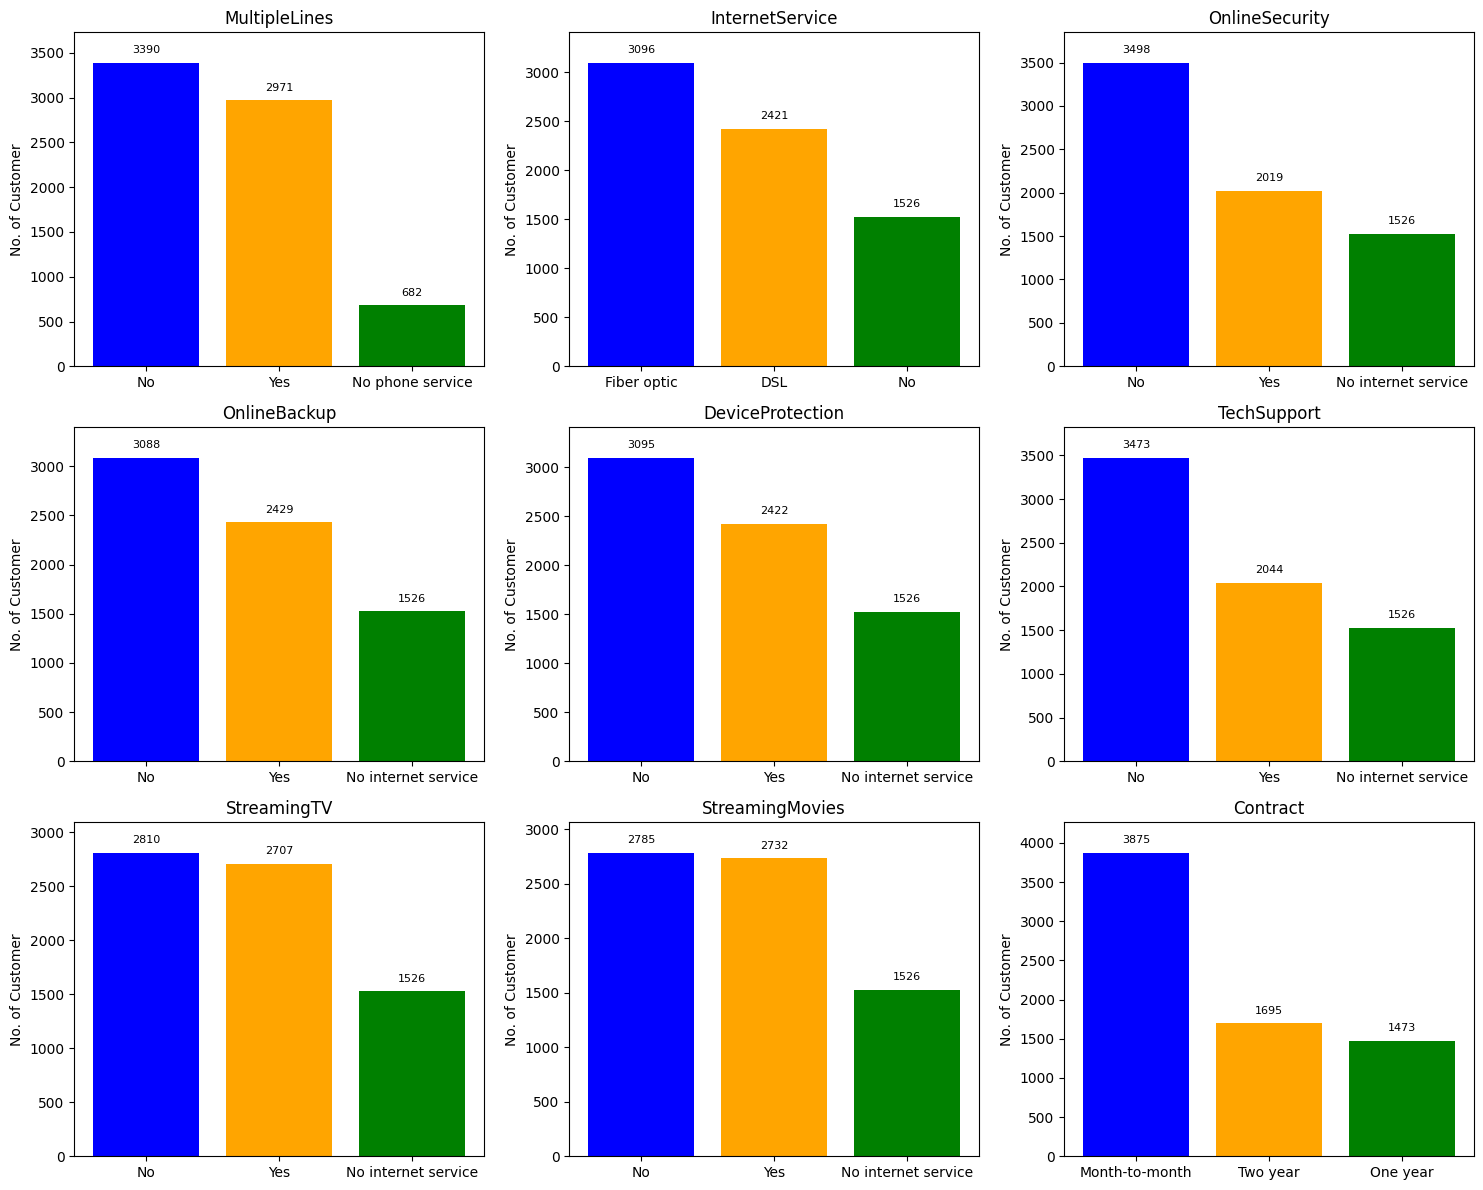

In [ ]:
columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']

# Membuat subplot 3x3
fig = plt.figure(figsize=(15, 12))

# Font properties for the text
font_properties = {
    'size': 8,
}

# Menambahkan setiap subplot secara manual
for i in range(1, len(columns)+1):
    ax = fig.add_subplot(3, 3, i)
    ax.set_title(columns[i - 1])
    ax.set_ylabel("No. of Customer")

    categories = df_eda[columns[i-1]].value_counts().index
    values = df_eda[columns[i-1]].value_counts().values

    bars = ax.bar(categories, values, color=['blue', 'orange', 'green'])

    # Determine the upper limit for the y-axis
    space = values.max()*0.05/2 # to create spacing between top vaue of bar and the text label
    y_max = values.max() + values.max()*0.1 # to create the limit of y-axis
    plt.ylim(0, y_max)

    for bar in bars:
      yval = bar.get_height()
      xval = bar.get_x() + bar.get_width()/2
      plt.text(xval, yval+space, str(int(yval)).upper(), ha='center', va='bottom', fontdict=font_properties)


# Menampilkan plot
plt.tight_layout()
plt.show()


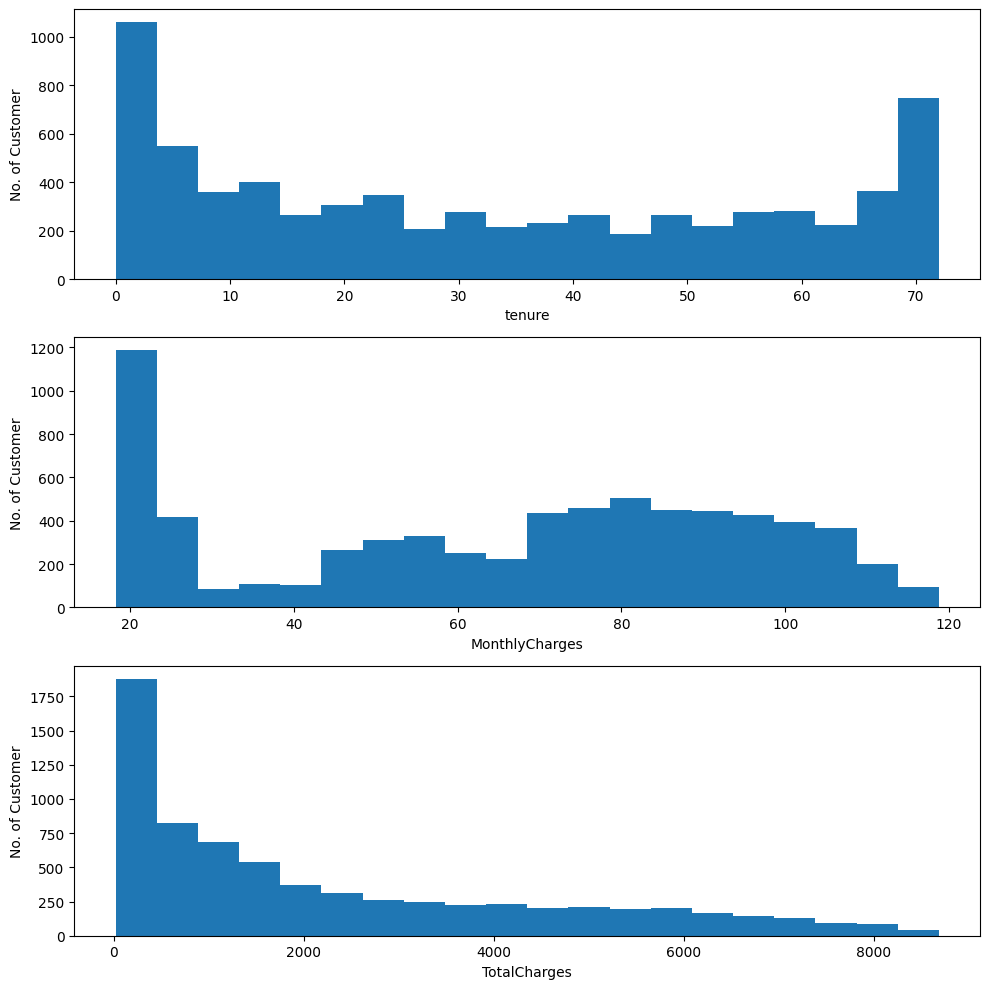

In [ ]:
columns = df_eda.select_dtypes(include=['float', 'int']).columns

# Membuat subplot 3x3
fig = plt.figure(figsize=(10, 10))

# Menambahkan setiap subplot secara manual
for i in range(1, len(columns)+1):
    ax = fig.add_subplot(3, 1, i)
    ax.hist(df_eda[columns[i-1]], bins=20)
    ax.set_xlabel(columns[i-1])
    ax.set_ylabel("No. of Customer")


# Menampilkan plot
plt.tight_layout()
plt.show()

Dari hasil distribusi pada fitur numerik di atas, terdapat 2 kesimpulan, yaitu:
1. Untuk masa waktu pinjaman atau tenure, kustomer lebih cenderung memilih masa waktu yang singkat atau masa waktu yang sangat lama.
2. Totalcharges kustomer sebagian besar berada dibawah 2000 dengan total biaya monthlycharge paling banyak diangka 20 ke bawah dan cukup banyak diangka 40 - 110.

## Insight

In [ ]:
def stack_plot(data, colors):
  # Membuat plot
  fig, ax = plt.subplots(figsize=(10, 5))
  bars = data.plot(kind='bar', stacked=True, ax=ax, color=colors)

  # Menambahkan teks pada bar
  font_properties = {'size': 12, 'weight': 'bold'}
  for bar in bars.patches:
      xval = bar.get_width()
      yval = bar.get_height()
      x, y = bar.get_xy()
      if yval > 5:  # Menambahkan teks hanya jika yval lebih besar dari 0
          label = str(int(yval)).upper()
          ax.text(x+xval/2,
                  y+yval/2,
                  '{:.1f}%'.format(yval),
                  ha='center',
                  va='center',
                  fontdict=font_properties)



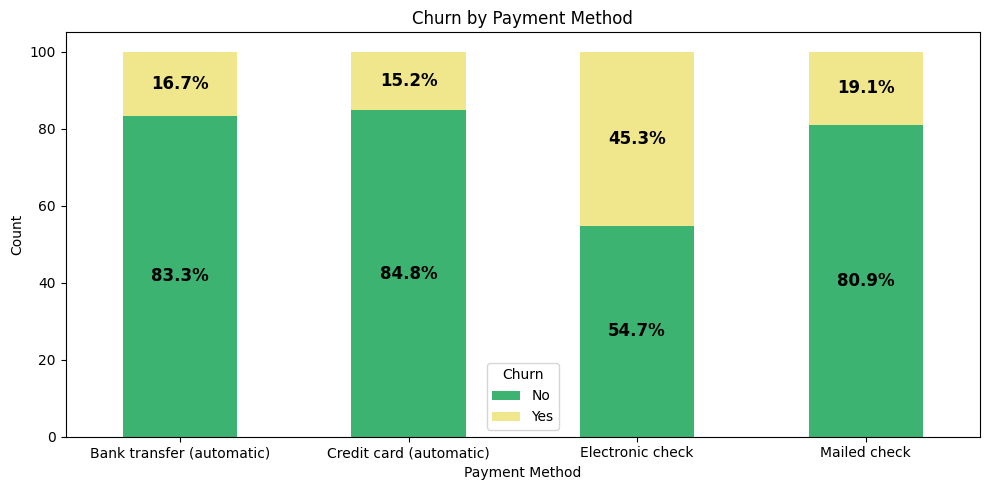

In [ ]:
# Membuat pivot table
pv = pd.pivot_table(df, index='PaymentMethod', columns='Churn', aggfunc='size', fill_value=0)
pv_percent = pv.div(pv.sum(axis=1), axis=0) * 100

stack_plot(pv_percent, ['#3CB371', '#F0E68C'])

plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.legend(title='Churn')
plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, secara umum ketiga metode pembayaran, yaitu bank transfer, credit card, dan mailed check memiliki rasio churn dan tidak churn yang cukup sama dengan rata-rata 17%. Sedangkan untuk electronic check ini cukup mengkhawatirkan karena rasio churn dan tidak churn itu rasionya hampir 1:1 sehingga bisa didrop aja metode melalui electronic check dan lebih fokus ketiga lainnya

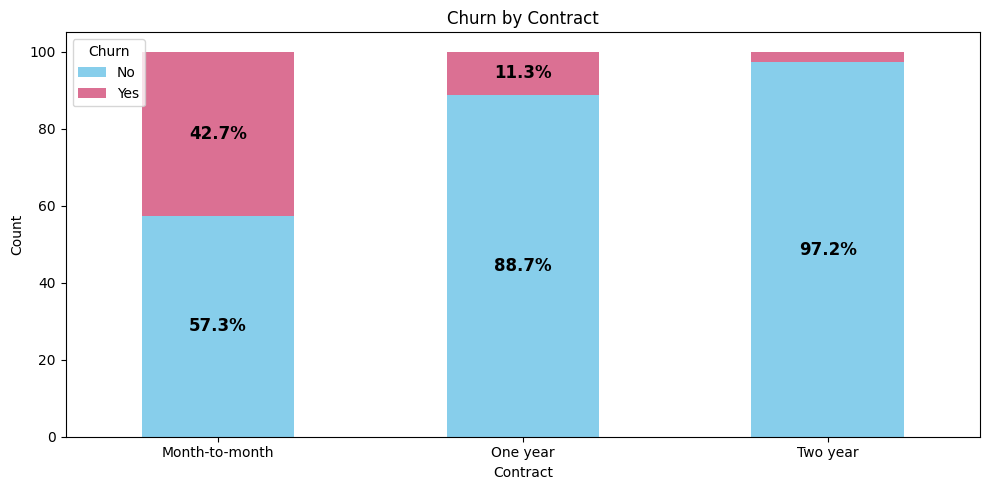

In [ ]:
# Membuat pivot table
pv = pd.pivot_table(df, index='Contract', columns='Churn', aggfunc='size', fill_value=0)
pv_percent = pv.div(pv.sum(axis=1), axis=0) * 100

stack_plot(pv_percent, ['#87CEEB', '#DB7093'])

plt.title('Churn by Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.legend(title='Churn')
plt.tight_layout()
plt.show()

Berdasarkan hasil grafik di atas, 42.7% customer yang melakukan kontrak month-to-month melakukan churn sedangkan kurang dari 12% kustomer yang melakukan churn untuk kontrak one year dan two year. Hal ini mungkin bisa dipertimbangkan untuk melihat behaviour dari kustomer yang melakukan kontrak month-to-month sehingga bisa dilakukan tindakan lebih lanjut untuk mencegah terjadinya churn. Namun, ada kemungkinan yang lain bahwa kustomer yang melakukan month-to-month hanya melakukan uji coba sehingga lebih rentan berpindah ke bank lain atau melakukan churn, sedangkan untuk kontrak one year dan two year merupakan kustomer yang sudah memiliki kepercayaan terhadap bank.


# Feature Engineering

In [ ]:
df_tmp = df.copy()

## Label Encoding

In [ ]:
encoders = {} # buat nyimpen objek encoder untuk kolom-kolom yg di-encode

# Label Encoding akan digunakan ke kolom kategori dengan 2 atau kurang unique values
le_count = 0
for col in df_tmp.columns[1:]:
    if df_tmp[col].dtype == 'object':
        if len(list(df_tmp[col].unique())) <= 2:
            print(col)
            le = LabelEncoder()
            le.fit(df_tmp[col])
            df_tmp[col] = le.transform(df_tmp[col])
            encoders[col] = le
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

gender
Partner
Dependents
PhoneService
PaperlessBilling
Churn
6 columns were label encoded.


## One-Hot Encoder

In [ ]:
df_tmp = df_tmp.drop(columns="customerID") # drop kolom customerID karena tidak relate dengan target

# ubah semua kategori data ke dummy

df_tmp= pd.get_dummies(df_tmp) # One-Hot Encoding

one_hot_columns = df_tmp.columns #kita simpan kolom2 hasil encoding untuk digunakan nanti

In [ ]:
one_hot_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMetho

In [ ]:
target = df_tmp["Churn"] # data target

df_tmp = df_tmp.drop(columns="Churn") # data fitur

In [ ]:
# lakukan splitting dataset ke data tes dan data latih
X_train, X_test, y_train, y_test = train_test_split(df_tmp, target,
                                                    stratify=target, # supaya ratio value di data training dan test sama
                                                    test_size = 0.2, # apabila jumlah data sangat banyak bisa gunakan 0.1
                                                    random_state = 0)

print("Dimensi X_train dataset: ", X_train.shape)
print("Dimensi y_train dataset: ", y_train.shape)
print("Dimensi X_test dataset: ", X_test.shape)
print("Dimensi y_test dataset: ", y_test.shape)

Dimensi X_train dataset:  (5634, 40)
Dimensi y_train dataset:  (5634,)
Dimensi X_test dataset:  (1409, 40)
Dimensi y_test dataset:  (1409,)


# Feature Scaling

In [ ]:
# lakukan feature scaling

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

# Model Selection

In [ ]:
# list model yang akan digunakan untuk dibandingkan

models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(('XGBoost Classifier', XGBClassifier(random_state=0)))

In [ ]:
# evaluasi model

acc_results = []
auc_results = []
names = []

col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']

# hasil metriks akurasi dan ROC akan ditampilkan dalam bentuk DataFrame
model_results = pd.DataFrame(columns=col)

# Evaluasi setiap model dengan cross-validation
i = 0
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.34,1.62,74.42,1.15
1,SVC,83.13,1.75,79.87,1.27
6,Random Forest,82.33,2.17,79.05,1.39
7,XGBoost Classifier,82.08,2.09,78.49,1.37
4,Gaussian NB,81.85,1.89,69.28,1.50
2,Kernel SVM,79.56,2.12,79.71,1.18
3,KNN,77.32,2.10,76.02,0.86
5,Decision Tree Classifier,66.80,2.26,73.62,1.59


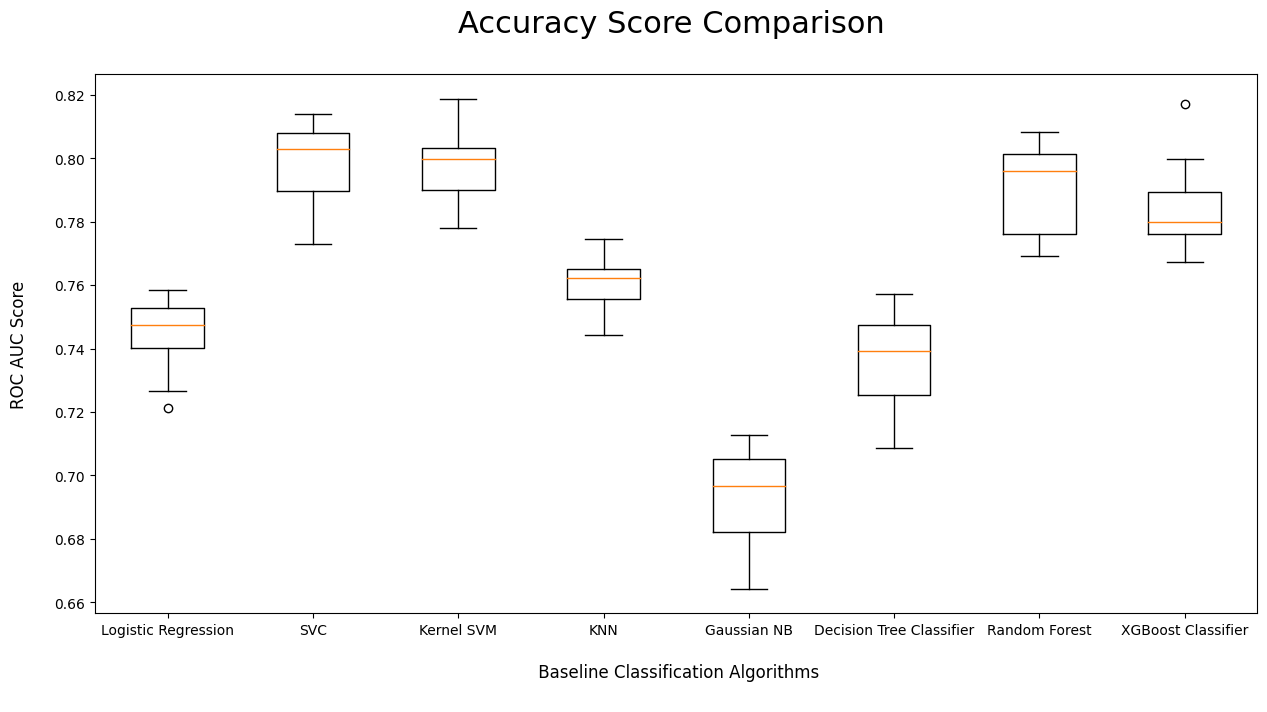

In [ ]:
# memvisualisasikan nilai akurasi setiap algoritma dalam bentuk boxplot

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

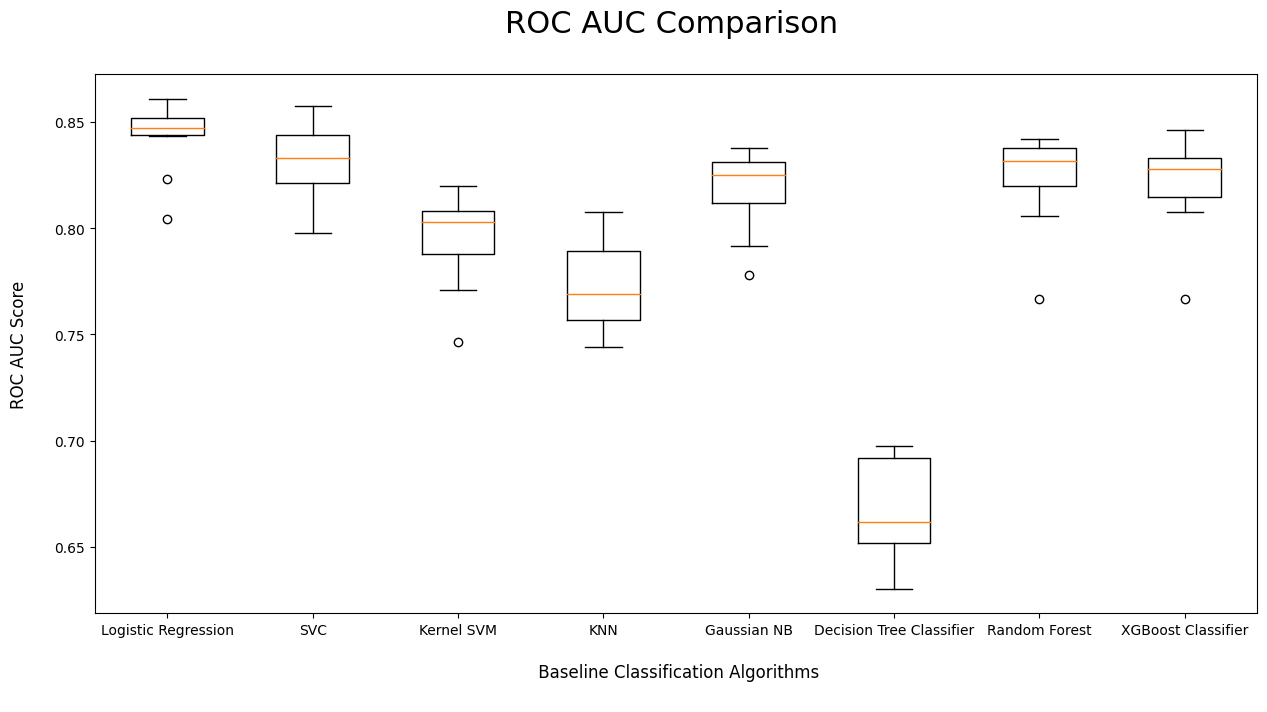

In [ ]:
# memvisualisikan nilai luas kurva ROC setiap algoritma

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

def evaluate_model(predictions,name):
    print('Model: ',name)
    print(classification_report(y_test,predictions))
    cm = confusion_matrix(y_test,predictions)
    disp   = ConfusionMatrixDisplay(cm)
    disp.plot()
    na = 'Conf'
    plt.title('Confusion Matrix for '+ name)

preds = []
for i in range(len(models)):
  preds.append([])

for i, model in enumerate(models):
    model[1].fit(X_train,y_train)
    preds[i] = model[1].predict(X_test)
preds

[array([0, 1, 1, ..., 0, 0, 1]),
 array([0, 0, 1, ..., 0, 0, 1]),
 array([0, 0, 1, ..., 0, 0, 1]),
 array([0, 0, 1, ..., 0, 0, 1]),
 array([0, 1, 1, ..., 0, 0, 1]),
 array([0, 0, 1, ..., 0, 1, 1]),
 array([0, 0, 1, ..., 0, 0, 1]),
 array([0, 0, 1, ..., 0, 0, 1])]

Model:  Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.52      0.81      0.63       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.77      1409

Model:  SVC
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

Model:  Kernel SVM
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg   

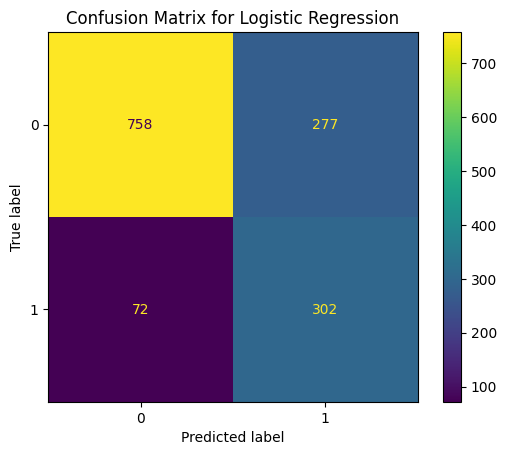

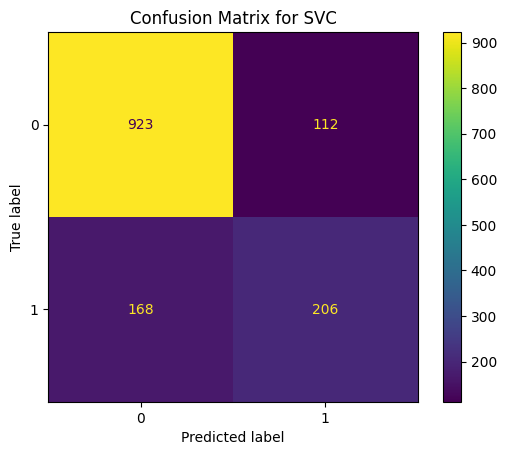

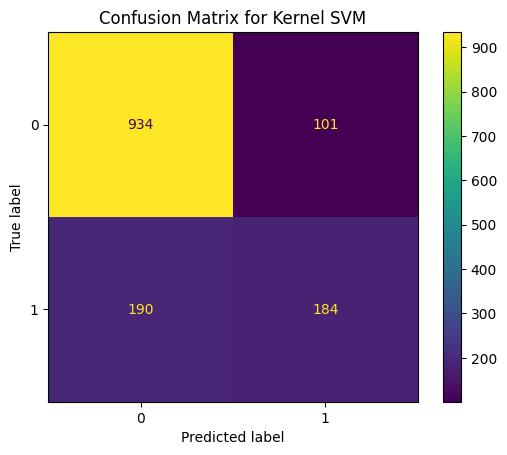

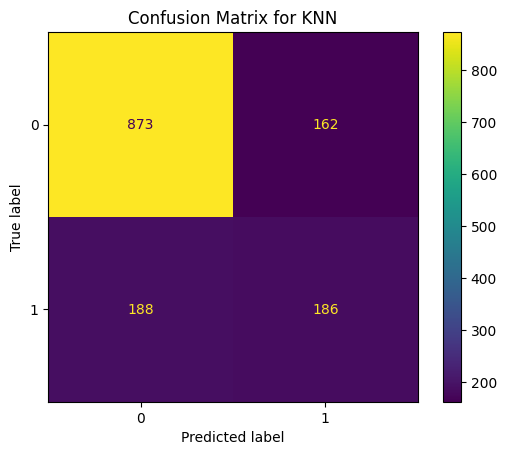

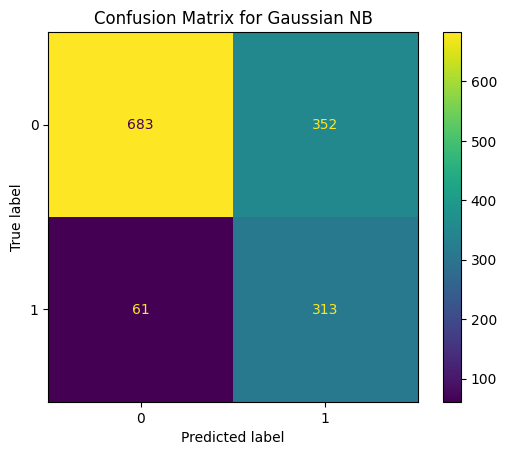

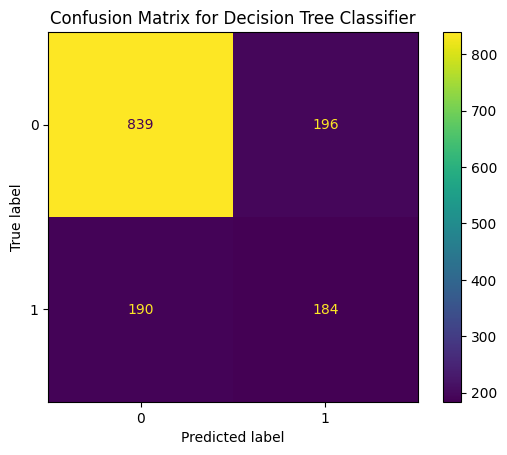

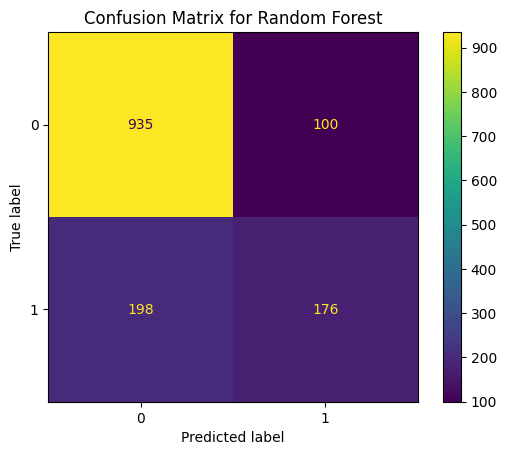

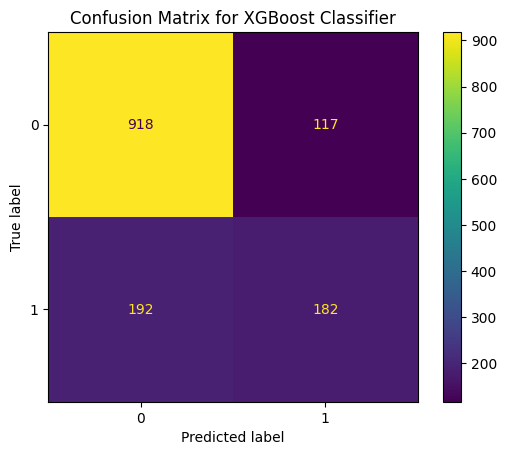

In [ ]:
for i in range(len(preds)):
  evaluate_model(predictions = preds[i], name = str(models[i][0]).split('(')[0])

Dari semua model yang telah dievaluasi, maka logistic regression menjadi model yang paling baik untuk digunakan karena nilai recall untuk kelas 1/yes jauh lebih tinggi dibandingkan model yang lain.

Kenapa kok recall kelas 1 yang dilihat? karena tujuan dari klasifikasi ini adalah untuk meminimalkan biaya dan waktu melakukan ads. Oleh karena itu, recall sangat penting karena kita ingin fokus ke pelanggan yang memiliki potensi untuk melakukan churn atau meninggalkan bank.